In [0]:
%matplotlib inline

# CMPS 144

## Assignment 2

**DUE: Monday February 11, 2019 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Amit Saxena"
STUDENT_ID = "1477548"

### Assignment Overview

In this assignment we'll use a subset of the Ames Housing Dataset, that has 28 explanatory variables describing many aspects of residential homes in Ames, Iowa. We would like to develope a model that can accurately predict a home's selling price given these variables. This assignment is primarily about exploratory data analysis. We begin by getting to know the dataset. As we procede, it will become clear which variables will be most important to our model, and which ones we can safely exclude.  

### Data fields

Here's a brief description of what the explanatory variables represent:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    Foundation: Type of foundation
    BsmtCond: General condition of the basement 
    TotalBsmtSF: Total square feet of basement area
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet  
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    KitchenQual: Kitchen quality
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    GarageYrBlt: Year garage was built
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    PoolQC: Pool quality
    Fence: Fence quality
    

Lets read in the dataset (this may take a moment).

In [214]:
# Some useful packages
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn.model_selection import train_test_split # to split off training and test sets
from sklearn import preprocessing  # for standardizing the data
from sklearn import metrics  # Useful for creating confusion matrices
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflow

# Some useful functions we'll be needing later
Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential

# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

# This loads in the dataset we'll be using for this assignment.
# https://drive.google.com/open?id=1gRWbC-rdBfxHyVcG-uCrAgJYJvHERJZO
file_id = '1gRWbC-rdBfxHyVcG-uCrAgJYJvHERJZO'
link = 'https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url = link.format(FILE_ID = file_id)

# Import the file as a Pandas data frame.
data = pd.read_csv(csv_url, sep=',')

# What are the dimensions of this dataset?
print('data.shape =', data.shape)

data.shape = (1460, 30)


There are 1460 records in this dataset, each of which has 30 variables (features). One variable is the record identifier (which is arbitrary and won't be used in our predictive model), and another is the dependent variable we're trying to predict, SalePrice, which leaves 28 potential independent (predictive) variables. Let's take a closer look.

In [215]:
# A summary of this dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
Id              1460 non-null int64
SalePrice       1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
Foundation      1460 non-null object
BsmtCond        1423 non-null object
TotalBsmtSF     1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
HeatingQC       1460 non-null object
CentralAir      1460 non-null object
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
KitchenQual     1460 non-null object
Functional      1460 non-null object
Fireplaces      1460 non-null int64
GarageYrBlt     1379 non-null float64
GarageCars      1460 non-null int64
GarageArea      14

Notice that this dataset has perhaps too many "features", including many that are of questionable predictive value with respect to the sale price. In the above summary is shown the number of records with non-null values; a null-value means this information is missing from that record. 

At risk of throwing the baby out with the bathwater, lets drop any columns of variables having less than 1460 non-null values. We can do this "manually" by simply dropping the columns in the above listing having less than 1460 non-null values. (We'll automate this process below.)

In a serious project one should never though out so much data - usually one carefully fills in missing values (if the missing values are relatively rare in the dataset). But for this assignment, we'll simplify things, though as a result we won't end up with the best possible model. This approach won't win you any Kaggle contests!

### Dropping Columns from the Dataframe

First, let's drop all columns with less than 1000 non-null values.  First we create a list of all the column names.

In [216]:
# Make a list of the column names, called "columns".
columns = data.columns
print(columns)
# # print(data.dtypes)
# print(data.shape)
# print(data.size)
# data.notna()
# c1 = columns[1]
# data.notna()[columns[1]]
# data.notna()[c1] * 1


Index(['Id', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'BsmtCond',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='object')


Now we'll do the dropping of all columns with less than 1000 non-null columns.

In [217]:
# We'll compile a list of columns to drop (those with some records lacking the column's info).
columns_to_drop = []

# Now lets loop through the columns, appending those with too many NaN values to our list of columns_to_drop.
for c in columns:
    if (data.notna()[c] * 1).sum() < 1000:
        columns_to_drop.append(c)

# This is one way to drop all these columns.
data = data.drop(columns=columns_to_drop)

print("These columns were dropped:", columns_to_drop)

These columns were dropped: ['PoolQC', 'Fence']


## Problem 1 

Eliminate all the variables with less than 1460 non-null columns.

In [218]:
#  YOUR CODE HERE
# We'll compile a list of columns to drop (those with some records lacking the column's info).
columns_to_drop = []
columns = data.columns

# Now lets loop through the columns, appending those with too many NaN values to our list of columns_to_drop.
for c in columns:
    if (data.notna()[c] * 1).sum() < 1460:
        columns_to_drop.append(c)

# This is one way to drop all these columns.
data = data.drop(columns=columns_to_drop)

print("These columns were dropped:", columns_to_drop)
columns = data.columns


These columns were dropped: ['LotFrontage', 'BsmtCond', 'GarageYrBlt', 'GarageQual', 'GarageCond']


### Eliminating non-numeric columns

We still have 21 variables to deal with.  So let's make our lives easier, by dropping all the non-numeric columns. These are referred to as categorical data.  There is much useful information in this categorical data, but in our initial exploration of the dataset we'll avoid opening that bag of worms!  (In a better model, one would one-hot encode much of this non-numeric data.)

In [219]:
# Drop all non-numeric (categorical) columns.
data = data.select_dtypes(include='number')

# What's left?
print(data.columns)
data.head()



Index(['Id', 'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea'],
      dtype='object')


,Id,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageCars,GarageArea
0,1,208500,8450,7,5,2003,2003,856,8,856,854,0,1710,0,2,548
1,2,181500,9600,6,8,1976,1976,1262,6,1262,0,0,1262,1,2,460
2,3,223500,11250,7,5,2001,2002,920,6,920,866,0,1786,1,2,608
3,4,140000,9550,7,5,1915,1970,756,7,961,756,0,1717,1,3,642
4,5,250000,14260,8,5,2000,2000,1145,9,1145,1053,0,2198,1,3,836


Now that we've whittled down this dataset to a manageable number of features, it's time to look more closely at the remaining features and their pairwise correlations.

### The most important variable

Since we're going to try to predict the sale price, the variable SalePrice is clearly important. So we'll take a closer look.

In [220]:
# Summary statistics for the sale price.
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

When trying to understand a variable, nothing beats actually seeing the distribution.

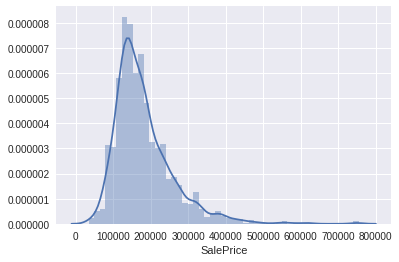

In [221]:
# SalePrice histogram.
sns.distplot(data['SalePrice'])

One can see that this variable deviates from normal by being right-skewed. Often we transform such variables so as to make the distribution approximately normal, since approximate normality is often an assumption made in statistical analyses. For example, the log of a right-skewed distribution tends to result in a distribution closer to normal:

---



---



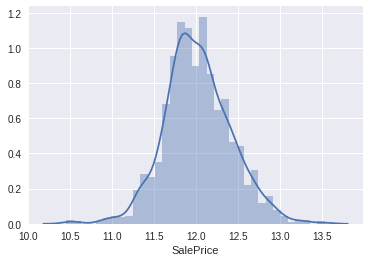

In [222]:
# SalePrice histogram.
sns.distplot(np.log(data['SalePrice']))

However, our analysis won't require the dependent variable to be approximately normal, so we won't need to log transform SalePrice in our model.

### Correlation

One of the first things one should do in any exploratory analysis is to look at the pairwise correlation of the explanatory variables. This dataset has so many variables that a correlation matrix heat map will yield the most pertinent info. Below, we set vmax=0.8, which means the top of the correlation scale represents a correlation of 0.8 or higher. We will consider variables so highly correlated to hold much the same information, i.e., redundant.

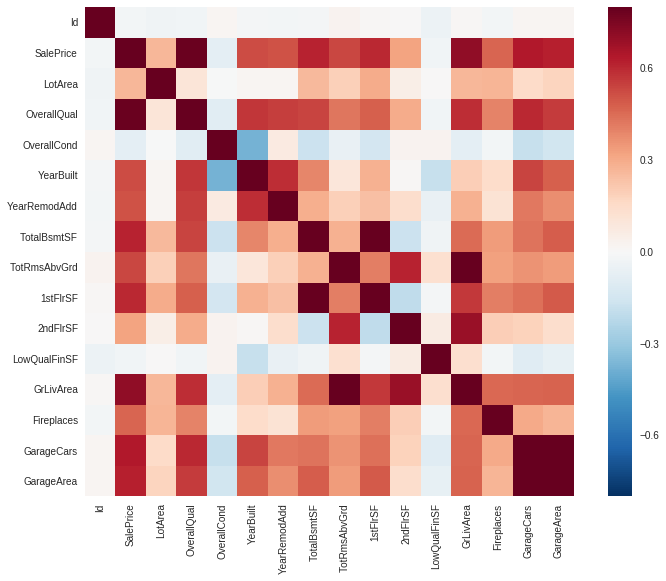

In [223]:
# Correlation Matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

The above heat map depicts all the pairwise correlations of the variables in the dataset. The main diagonal (upper left to lower right) shows that each variable correlates highly with itself (correlation = 1). Some of the variables correlate highly to others, for example GarageCars correlates very highly with GarageArea. This may mean that both of these variables contain essentially the same information, and we may only need one of them.

## Problem 2 

What other variables are highly correlated here? Pair all the ones that are highly correlated (but leave out the self-correlations, please), like this:   

            
            
            [GarageCars, GarageArea],  ...

[YOUR ANSWER HERE]

[GarageCars, GarageArea],  [GrLivArea, TotRmsAbvGr] , [1stFlrSF, TotalBsmtSF] , [SalePrice, OverallQual]
            

### Correlation with SalePrice

It's useful to see how the variables that correlate most highly with SalePrice.

The 11 columns with the highest correlation with Sale Price:
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces']


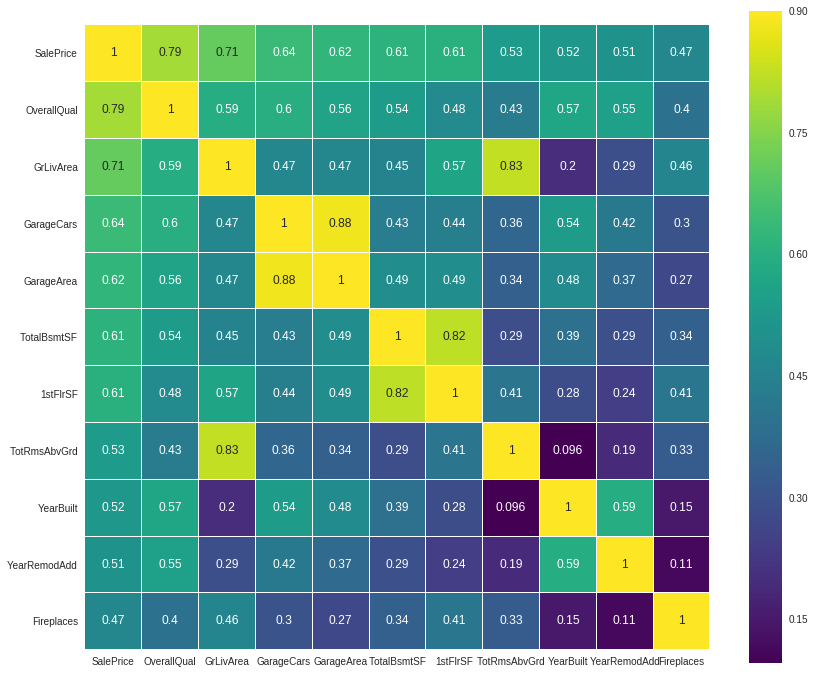

In [224]:
k = 11   # we'll look at the 11 largest correlations
correlation = data.corr()

cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
# print(cols)

print('The', k, 'columns with the highest correlation with Sale Price:')
print(list(cols))   # the k variables that correlate most highly with SalePrice

cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, 
            vmax = .9, 
            linewidths = 0.01, 
            square = True, 
            annot = True, 
            cmap = 'viridis',
            linecolor = "white", 
            xticklabels = cols.values, 
            annot_kws = {'size': 12}, 
            yticklabels = cols.values)

## Problem 3 

Drop one column (only one) of the dataset for one of the pairs you wrote out above. I'll illustrate how you can accomplish this:

In [0]:
## Don't run this!
## data = data.drop(columns=['This_Column'])   # If This_column were a column, it wouldn't be anymore!

However, you should definitelyl not drop the SalePrice column, since this is the one we're trying to predict, and we need it to provide labels for our learning algorithm (for any supervised learning algorithm we may wish to implement). What column would be the best one to drop? Just think about the meaning of the variables highly correlated with other variables in the pairs you wrote out above, and decide which pair is most likely to hold redundant information. Also think carefully about which variable is the best one to drop, and which is the best to retain, of the pair you selected. Explain why you selected this variable?

In [0]:
#  YOUR CODE HERE
data = data.drop(columns=['GarageArea'])


#### Why did you drop this variable?

[YOUR ANSWER HERE]

I dropped 'GarageArea' because it  highly correlated with  'GarageCars'.  I dropped this over 'GarageCars' because it had a slightly lower corollation with 'SalePrice' than 'GarageCars'. 

###  Data Visualization

Another way to visualize how the variables correlate with each other is via pairwise scatterplots, like the following ones of the variables most correlated with the sale price.

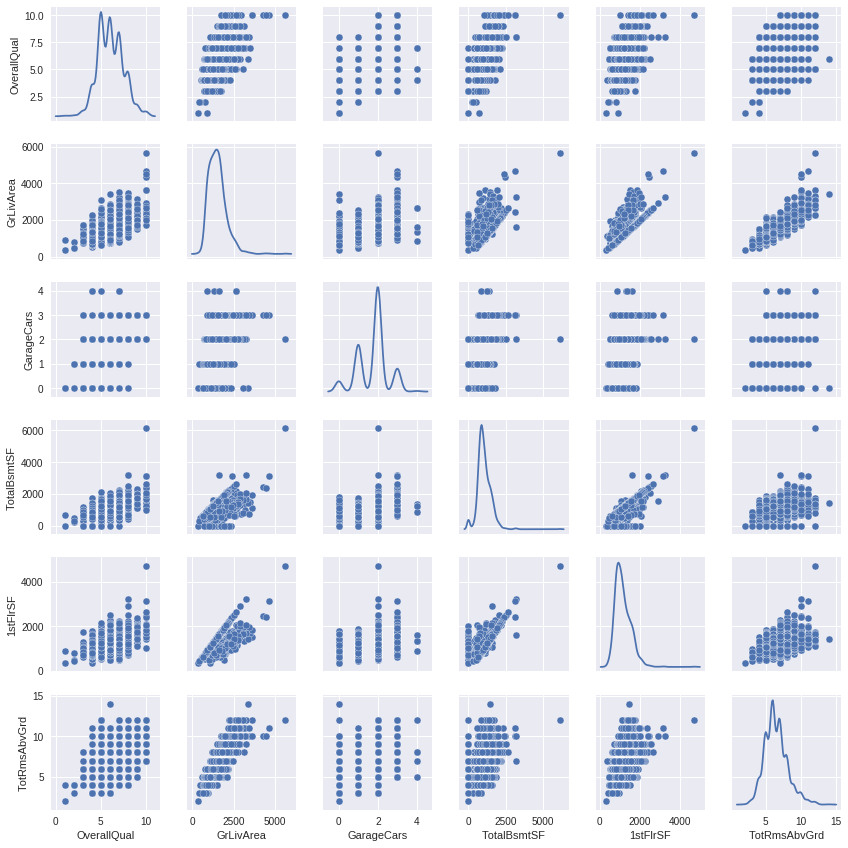

In [227]:
sns.set()
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd']
sns.pairplot(data[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

Much may be gleaned from contemplating the above figure. Notice the main diagonal plots showing the distribution of  each variable in the dataset. Also notice patterns like GrLivArea and 1stFlrSF where you can see that $~~\text{GrLivArea}\leq \text{1stFlrSF}$. 

Also, it's often useful to make box plots of the variables that correlate most highly with the target variable, as in the following plot.

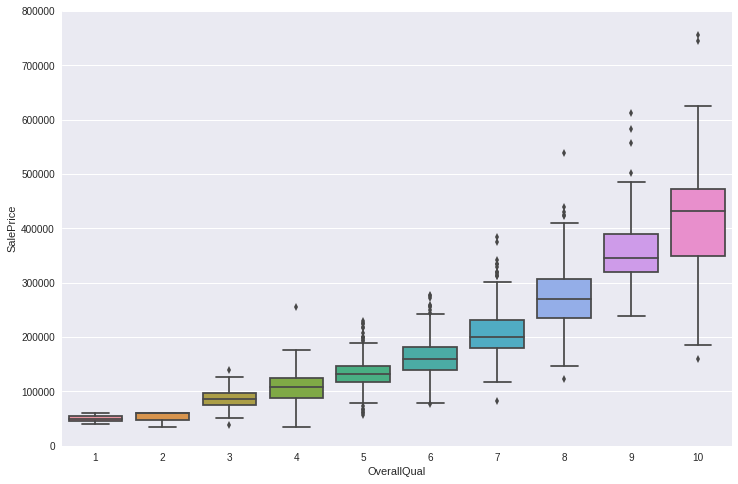

In [228]:
dat = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=dat)
fig.axis(ymin=0, ymax=800000);

Notice the outliers. These are the datapoints outside of the box and whisker plots. (We'll soon delete the top right two - their leverage would most seriously effect any regression model, of all the outliers.)

Let's look at the correlations again, but this time numerically.

In [229]:
# Correlation Matrix
corrmat = data.corr()
corrmat.round(2)

,Id,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageCars
Id,1.00,-0.02,-0.03,-0.03,0.01,-0.01,-0.02,-0.02,0.03,0.01,0.01,-0.04,0.01,-0.02,0.02
SalePrice,-0.02,1.00,0.26,0.79,-0.08,0.52,0.51,0.61,0.53,0.61,0.32,-0.03,0.71,0.47,0.64
LotArea,-0.03,0.26,1.00,0.11,-0.01,0.01,0.01,0.26,0.19,0.30,0.05,0.00,0.26,0.27,0.15
OverallQual,-0.03,0.79,0.11,1.00,-0.09,0.57,0.55,0.54,0.43,0.48,0.30,-0.03,0.59,0.40,0.60
OverallCond,0.01,-0.08,-0.01,-0.09,1.00,-0.38,0.07,-0.17,-0.06,-0.14,0.03,0.03,-0.08,-0.02,-0.19
YearBuilt,-0.01,0.52,0.01,0.57,-0.38,1.00,0.59,0.39,0.10,0.28,0.01,-0.18,0.20,0.15,0.54
YearRemodAdd,-0.02,0.51,0.01,0.55,0.07,0.59,1.00,0.29,0.19,0.24,0.14,-0.06,0.29,0.11,0.42
TotalBsmtSF,-0.02,0.61,0.26,0.54,-0.17,0.39,0.29,1.00,0.29,0.82,-0.17,-0.03,0.45,0.34,0.43
TotRmsAbvGrd,0.03,0.53,0.19,0.43,-0.06,0.10,0.19,0.29,1.00,0.41,0.62,0.13,0.83,0.33,0.36
1stFlrSF,0.01,0.61,0.30,0.48,-0.14,0.28,0.24,0.82,0.41,1.00,-0.20,-0.01,0.57,0.41,0.44


Take note especially of those variables that correlate highly, both positively and negatively, with SalePrice. Those variables with this correlation close to zero won't have much predictive power (in a linear model anyway).

### More Data Visualization

Next we'll see how the two features with the highest correlations with SalePrice in the above table appear in a scatterplot, with the color of the dots representing the sale price.

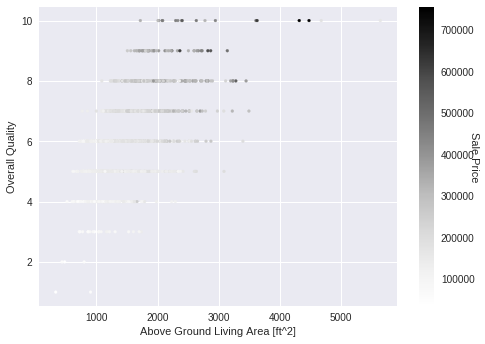

In [230]:
from matplotlib.colors import ListedColormap as colormap

plt.scatter(x = 'GrLivArea', 
            y = 'OverallQual', 
            c = 'SalePrice', 
            data = data,
            s = 8)   # dot size
plt.xlabel('Above Ground Living Area [ft^2]')
plt.ylabel('Overall Quality')
cbar = plt.colorbar()
cbar.set_label('Sale Price', rotation=270)
plt.show()

From the above scatterplot, one can once again discern the two outliers we noticed before among the boxplots. Interestingly, in the above scatterplot, these are precisely the two records with the largest living area (the two dots on the top right in the above figure). We'll delete these from the dataset, as they are only two records, but can exert inordinate leverage in regression models. But first we need to locate which rows to delete.

### Problem 4

Find the rows of those two outliers. Use the following command (but on a different variable and with a different numeric constraint).

In [231]:
# Example - Find all rows where the sale price is greater than $700000.
# print( data['GrLivArea'] > 4500 )
# print(type(data['GrLivArea']))


large_area = np.where(data['GrLivArea'] > 4500)[0]

low_price = np.where(data['SalePrice'] < 200000)[0]


outliers = set(large_area).intersection(set(low_price))

for outlier in outliers: 
  print(data.iloc[outlier])

Id                1299
SalePrice       160000
LotArea          63887
OverallQual         10
OverallCond          5
YearBuilt         2008
YearRemodAdd      2008
TotalBsmtSF       6110
TotRmsAbvGrd        12
1stFlrSF          4692
2ndFlrSF           950
LowQualFinSF         0
GrLivArea         5642
Fireplaces           3
GarageCars           2
Name: 1298, dtype: int64
Id                 524
SalePrice       184750
LotArea          40094
OverallQual         10
OverallCond          5
YearBuilt         2007
YearRemodAdd      2008
TotalBsmtSF       3138
TotRmsAbvGrd        11
1stFlrSF          3138
2ndFlrSF          1538
LowQualFinSF         0
GrLivArea         4676
Fireplaces           1
GarageCars           3
Name: 523, dtype: int64


[YOUR ANSWER HERE]


Records with id 1299 and 524

### Deleting the Outliers

Next we'll delete the outliers you found (make sure your command above does find them!).  Then we'll look at a new scatterplot without those outliers.

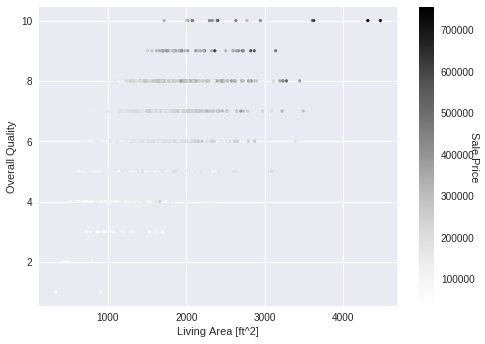

In [232]:
# Delete these two outlier rows.
data = data.drop(list(np.where(data['GrLivArea'] > 4500)[0]), axis=0)   # axis=0 indicates a row

# Now let's reexamine the scatterplot.
plt.scatter(x = 'GrLivArea', 
            y = 'OverallQual', 
            c = 'SalePrice', 
            data = data,
            s = 8)   # dot size
plt.xlabel('Living Area [ft^2]')
plt.ylabel('Overall Quality')
cbar = plt.colorbar()
cbar.set_label('Sale Price', rotation=270)
plt.show()

The top right outliers (two purplish dots in the previous scatterplot), are gone.

### Training and Test Sets
Next, we'll seperate our data into a training set and a test set. Our model will be based on the training set, and we'll use it to try to predict the values in the test set.  The test set is kept seperate from the training set, so we can get an idea of how well our model will perform on new, as yet unseen data.

In [0]:
# We'll use all the columns except Id and SalePrice to try to predict SalePrice.
cols = data.columns.tolist()[2:]    # exclude Id and SalePrice, the 1st two columns
X = data[cols]
y = data['SalePrice']  # SalePrice holds our labels (for supervised learning)

# This library will help us randomly split our data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [234]:
# X holds the data we'll use to predict the labels y.
X_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageCars
1171,9120,6,6,1958,1958,1261,6,1261,0,0,1261,1,2
75,1596,4,5,1973,1973,462,5,526,462,0,988,0,1
390,8405,5,8,1900,1950,861,7,961,406,0,1367,0,1
1283,9400,6,5,1971,1971,912,8,912,912,0,1824,0,0
683,11248,9,5,2002,2002,1626,7,1668,0,0,1668,1,3


In [235]:
# y holds the corresponding labels.
y_train.head()

1171    163000
75       91000
390     119000
1283    139000
683     285000
Name: SalePrice, dtype: int64

So we now have X_train, the data we're using to train our model to predict the given corresponding lables y_train.  Once we've trained our model, we can then use it to try to predict the labels for the X_test data (we can then compare our predictions with the known labels stored in y_test).

### Linear Regression

Now we'll create a linear regression model (some would call this multiple regression, since we're using 13 predictor variables rather than 1). The machine learning library SciKit-Learn (sklearn) will do the heavy lifting.

In [236]:
X_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageCars
1171,9120,6,6,1958,1958,1261,6,1261,0,0,1261,1,2
75,1596,4,5,1973,1973,462,5,526,462,0,988,0,1
390,8405,5,8,1900,1950,861,7,961,406,0,1367,0,1
1283,9400,6,5,1971,1971,912,8,912,912,0,1824,0,0
683,11248,9,5,2002,2002,1626,7,1668,0,0,1668,1,3


In [237]:
from sklearn import linear_model

# This next line defines a linear model that still must be fit to our training data.
lm = linear_model.LinearRegression()
# Fitting our data to the model is now easy!
model = lm.fit(X_train, y_train)

# Let's examine this model.

# How well does our model predict the known labels in our training and test sets?
print('Training set R^2 =', lm.score(X_train, y_train))
print('Test set R^2 =', lm.score(X_test, y_test))

Training set R^2 = 0.827866133983381
Test set R^2 = 0.8408416379086445


Not bad!  ( Usually the training set accuracy is better than that of the test set. )

### Logistic Regression

Now we'll tweak our dataset into one suitable for logistic regression. All we need to do is to bring our labels y_train and y_test back into the dataframes X_train and X_test, and use the variable OverallQual our new y labels. Then we can use all the other variables to try to predict the overall quality of a house, a number from 1 to 10. This is now a classification problem idealy suited to logistic regression.

First we need to change labels. This takes 4 steps...

In [0]:
# Step 1 - Save the old labels y_train in a temporary location.
temp = y_train.copy() 

# Step 2 - Copy the OverallQual column from X_train to y_train.
y_train = X_train['OverallQual'].copy()

# Step 3 - Drop the OverallQual column from X_train.
X_train = X_train.drop(columns=['OverallQual'])

# Step 4 - Make the old y_train a new SalePrice column in X_train.
X_train['SalePrice'] = temp

### Problem 5

Perform the same sequence of 4 steps, to the test data.

In [0]:
# YOUR CODE HERE
# Step 1 - Save the old labels y_test in a temporary location.
temp = y_test.copy() 

# Step 2 - Copy the OverallQual column from X_test to y_test.
y_test = X_test['OverallQual'].copy()

# Step 3 - Drop the OverallQual column from X_test.
X_test = X_test.drop(columns=['OverallQual'])

# Step 4 - Make the old y_test a new SalePrice column in X_test.
X_test['SalePrice'] = temp

### Now for the logistic regression itself!

And now for the actual logistic regression, also consisting of 4 steps...

In [0]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

# Step 2. Create an instance of the model
logisticRegr = LogisticRegression()

# Step 3. Train the model on the data
logisticRegr.fit(X_train, y_train)

# Step 4. Predict labels for the test data
predictions = logisticRegr.predict(X_test)

Let's see how well our logistic regression model performs.

In [241]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.4075342465753425


That accuracy isn't so good. However, there are 10 categories, so random guessing would on average achieve only 0.10 accuracy. So our model has at least beat that very low benchmark!   :)

We can do much better than this... Other machine learning models, like neural networks or random forests, may be better suited to this classification task than logistic regression. Next we'll construct neural networks [NN] to create a better model for this data.

### Neural Network

We also need to standardize the remaining data, $X$, for our neural net to have some success. Each variable is translated to a z-score, i.e., each value $x_i$ is replaced by

$$z_i = \frac{x_i - \text{mean}(x)}{\text{std}(x)}.$$

Luckily, this is easily accomplished with Python (with sklearn). 

In [0]:
# Standardize the data.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 

# We also need to transform the test set, using the same means and standard deviations
# that were calculated from and used to transform the training set data.
X_test = scaler.transform(X_test) 

In Keras (the package we'll use to construct neural networks), being Pythonic, multiple categories start with 0, while our labels are all in {1,2,...,10}.  So we need to transform our label values to be in {0,1,...,9}. Python makes that easy!

In [243]:
# {1,2,...,10} -->  {0,1,...,9}
y_train -= 1   # subtract 1 from each entry in y_train
y_test -= 1

print('Now the lables are', set(y_train))

Now the lables are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### One-Hot Encoding

Categorical data needs to be one-hot encoded to be used in neural networks.  For example, suppose your categorical variable can take on one of three values, is one-hot encoded as follows:

$$\begin{bmatrix}
\text{red} \\
\text{green} \\
\text{blue}
\end{bmatrix}
\quad \to \quad
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$$

Our values {0,1,...,9} are being treated as categorical data here, even though they have numeric values. This is easy to do in Python with the sklearn method, *to_categorical*.

In [0]:
# One-hot encode the categorical labels.
train_hot_labels = to_categorical(y_train, num_classes = 10)
test_hot_labels = to_categorical(y_test, num_classes = 10)

### Building our Neural Network

Now it's time to construct a neural network to tackle this classification problem. Python with keras makes this easy.  I've included an alternate form of defining the same network. This network consists of an input vector of 13 neurons in layer 0 each connected to each of 100 neurons in layer 1. This implements a matrix multiplication, where the  matrix elements are the weights of the network. The resulting product is a vector which is then passed through a nonlinear sigmoid function. The sigmoid transformed vector is then multiplied by yet another weight matrix to yield a vector of 40 values to form layer 2 of our NN.  The resulting vector is then passed through a sigmoid function, yielding 10 final values, which are passed through a softmax transformation. This results in a probability distribution being output by our neural network. The training process is one of backpropogating the error through the network, adjusting the matrices of weights (using equations implementing gradient descent). After training, the probability distribution output by the NN assigns probabilities for classifying the input to one of the 10 categories we're trying to predict, allowing our NN to predict the correct category (hopefully!).

Warning - this may take a moment or two, we're training for 200 epochs...

In [245]:
#                                #
# Construct our neural net model #
#                                #

'''
# This is an alternative form for creating a model in keras.
model = keras.Sequential([
    Dense(100, input_shape=(13,)),
    Activation('sigmoid'),
    Dense(40),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax')  
])'''

# Instantiate a new neural network model
model = Sequential()

# Add some layers.
# Fist the input layer, which has 13 values, is connected to hidden layer 1, with 100 nodes (neurons).
model.add(Dense(100, activation='sigmoid', input_dim = 13))
# Layer 2, hidden layer
model.add(Dense(40, activation='sigmoid'))
# Layer 3, output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the NN model, defining the optimizer to use, the loss function, and the metrics to use.
# These settings are appropriate for a multiple-class classification task.
model.compile(optimizer = 'rmsprop',     
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, train_hot_labels, 
                    validation_split = 0.33, 
                    epochs = 200, 
                    batch_size = 32)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(X_train, train_hot_labels)
test_loss, test_acc = model.evaluate(X_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Train on 781 samples, validate on 385 samples
Epoch 1/200
781/781 [==============================] - 0s 405us/sample - loss: 2.1517 - acc: 0.2471 - val_loss: 1.8613 - val_acc: 0.2883
Epoch 2/200
781/781 [==============================] - 0s 61us/sample - loss: 1.7963 - acc: 0.3035 - val_loss: 1.7033 - val_acc: 0.3766
Epoch 3/200
781/781 [==============================] - 0s 62us/sample - loss: 1.6869 - acc: 0.4046 - val_loss: 1.6193 - val_acc: 0.4571
Epoch 4/200
781/781 [==============================] - 0s 62us/sample - loss: 1.6174 - acc: 0.4315 - val_loss: 1.5490 - val_acc: 0.4286
Epoch 5/200
781/781 [==============================] - 0s 81us/sample - loss: 1.5511 - acc: 0.4366 - val_loss: 1.4936 - val_acc: 0.4468
Epoch 6/200
781/781 [==============================] - 0s 61us/sample - loss: 1.4935 - acc: 0.4558 - val_loss: 1.4407 - val_acc: 0.4416
Epoch 7/200
781/781 [==============================] - 0s 62us/sample - loss: 1.4408 - acc: 0.4533 - val_loss: 1.3921 - val_acc: 0.4623
E

Our network attained a test set accuracy of only 0.54. But that's much better than the 0.41 accuracy we achieved using logistic regression. 

One reason for our models' poor performance becomes evident when we look at how many examples of each category were present in our training set:

In [246]:

for i in range(10):  print('Label', i, 'has', sum(y_train == i), 'examples.')

Label 0 has 2 examples.
Label 1 has 1 examples.
Label 2 has 17 examples.
Label 3 has 90 examples.
Label 4 has 315 examples.
Label 5 has 309 examples.
Label 6 has 257 examples.
Label 7 has 133 examples.
Label 8 has 32 examples.
Label 9 has 10 examples.


Our training set had only 2 examples of the first category, and only 1 example of the second. In fact labels 0, 1, 2, 8, and 9 seem to have an insufficient number of examples to allow our NN to generalize properly; we would expect any model to have difficulty learning to make predictions with so few examples.

### Training History 

Notice in the above code, right after we compiled our NN model, the line of code that initiated the training of our NN:

    history = model.fit(X_train, train_hot_labels, epochs=100, batch_size=32)

We could have left off the "history =" part of the above line, and the training would occur just the same. But including the history output allows us to track the course of our training. Plotting this data can reveal much about our data and our model, including whether our model is underfitting or overfitting. So let's see what secrets we can discover in history.

In [247]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


We'll plot 'acc', the accuracy of our model, as a function of the number of training iterations.

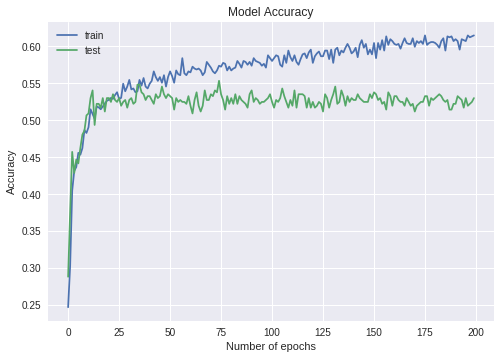

In [248]:
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Notice that the accuracy for the training set kept increasing while the accuracy for the test set leveled off after about 40 epochs. The widening gap after 40 epochs indicates that our model is overfitting.

We can also plot the flip side of the accuracy, the cross-entropy loss.

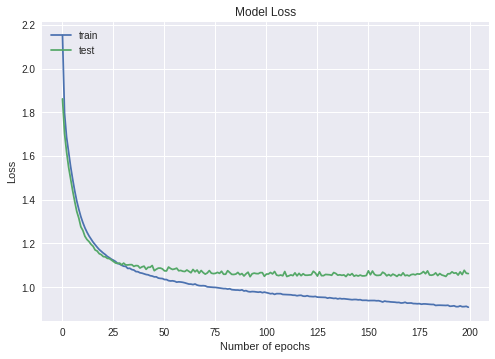

In [249]:
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Overfitting

Sufficiently large neural networks are great at memorizing the training set. This is the bane of overfitting. We want our NN to generalize to new data, not to memorize the training set. We'll redo the above training and analysis, but this time with a neural network that's too big, i.e., has so many trainable weights that it can easily memorize the training set. You'll see that the training set accuracy gets close to 1, while the test set accuracy is terrible and gets worse and worse as the training preceeds.

### Problem 6

Create a new neural network, with 500 nodes in the first layer, 400 nodes in the second, 200 nodes in the third, and 10 in the last layer. Train this network as we did before, but increase the number of epochs to 300.  (Be patient, this may take a few minutes.)

In [250]:
# YOUR CODE HERE
#                                #
# Construct our neural net model #
#                                #

'''
# This is an alternative form for creating a model in keras.
model = keras.Sequential([
    Dense(100, input_shape=(13,)),
    Activation('sigmoid'),
    Dense(40),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax')  
])'''

# Instantiate a new neural network model
model = Sequential()

# Add some layers.
# Fist the input layer, which has 13 values, is connected to hidden layer 1, with 500 nodes (neurons).
model.add(Dense(500, activation='sigmoid', input_dim = 13))
# Layer 2, hidden layer
model.add(Dense(400, activation='sigmoid'))
# Layer 3, hidden layer
model.add(Dense(200, activation = 'sigmoid'))
# Layer 4, output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the NN model, defining the optimizer to use, the loss function, and the metrics to use.
# These settings are appropriate for a multiple-class classification task.
model.compile(optimizer = 'rmsprop',     
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, train_hot_labels, 
                    validation_split = 0.33, 
                    epochs = 300, 
                    batch_size = 32)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(X_train, train_hot_labels)
test_loss, test_acc = model.evaluate(X_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Train on 781 samples, validate on 385 samples
Epoch 1/300
781/781 [==============================] - 1s 719us/sample - loss: 1.8213 - acc: 0.2446 - val_loss: 1.7226 - val_acc: 0.2623
Epoch 2/300
781/781 [==============================] - 0s 276us/sample - loss: 1.6704 - acc: 0.2817 - val_loss: 1.5320 - val_acc: 0.4000
Epoch 3/300
781/781 [==============================] - 0s 269us/sample - loss: 1.4893 - acc: 0.3918 - val_loss: 1.5423 - val_acc: 0.3429
Epoch 4/300
781/781 [==============================] - 0s 264us/sample - loss: 1.3709 - acc: 0.4379 - val_loss: 1.5442 - val_acc: 0.3429
Epoch 5/300
781/781 [==============================] - 0s 274us/sample - loss: 1.3164 - acc: 0.4494 - val_loss: 1.2623 - val_acc: 0.4701
Epoch 6/300
781/781 [==============================] - 0s 265us/sample - loss: 1.2715 - acc: 0.4635 - val_loss: 1.2416 - val_acc: 0.4701
Epoch 7/300
781/781 [==============================] - 0s 272us/sample - loss: 1.2253 - acc: 0.4750 - val_loss: 1.3647 - val_acc: 0.

#### Congratulations on creating your first neural network!!   :-) ####

### Problem 7

Redo the accuracy and loss graphs for this new, larger NN model.

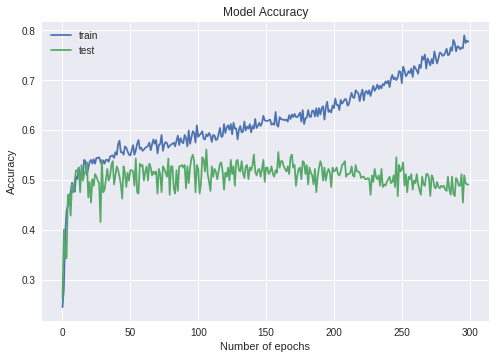

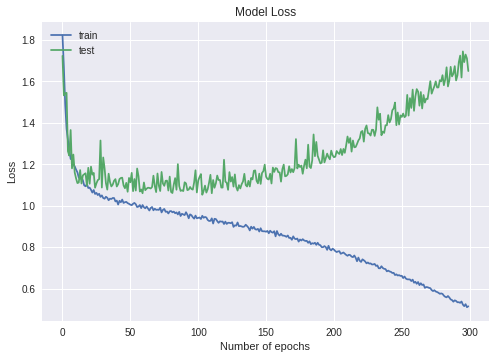

In [251]:
# YOUR CODE HERE
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

One sees the accuracy on the training set keep increasing, while the test set accuracy decreases. The cross-entropy loss plot similarly shows the loss for the training set continues to decrease, while the loss for the test set increases. This is indicative of overfitting.  If we continued training, eventually our NN would have memorized the training dataset, and would attain an accuracy of 1 on this dataset. At this point, its performance on the test data would be quite poor.

### Model Summary
Below is a summary of the neural network model you just created.

In [252]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 500)               7000      
_________________________________________________________________
dense_28 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_29 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2010      
Total params: 289,610
Trainable params: 289,610
Non-trainable params: 0
_________________________________________________________________
